In [2]:
# importamos las librerías necesarias
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import ast
warnings.filterwarnings('ignore')
from langdetect import detect
import re
from scipy import stats

In [3]:
# guardamos la ruta del archivo en una variable
reviews_file = 'c:\\Users\\Sofia\\Desktop\\Datasets\\australian_user_reviews.json'

In [ ]:
# Antes de cargarlo, vemos una linea del archivo, observamos datos anidados en la columna reviews
{'user_id': '76561197970982479', 
 'user_url': 'http://steamcommunity.com/profiles/76561197970982479', 
 'reviews': 
            [{'funny': '', 'posted': 'Posted November 5, 2011.', 'last_edited': '', 'item_id': '1250', 'helpful': 'No ratings yet', 'recommend': True, 'review': 'Simple yet with great replayability. In my opinion does "zombie" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth "zombie" splattering fun for the whole family. Amazed this sort of FPS is so rare.'}, 
             {'funny': '', 'posted': 'Posted July 15, 2011.', 'last_edited': '', 'item_id': '22200', 'helpful': 'No ratings yet', 'recommend': True, 'review': "It's unique and worth a playthrough."}, 
             {'funny': '', 'posted': 'Posted April 21, 2011.', 'last_edited': '', 'item_id': '43110', 'helpful': 'No ratings yet', 'recommend': True, 'review': 'Great atmosphere. The gunplay can be a bit chunky at times but at the end of the day this game is definitely worth it and I hope they do a sequel...so buy the game so I get a sequel!'}
             ]
}

In [5]:
# definimos una función para abrir el archivo
def open_json(file):
    '''
    Abre archivo JSON. Retorna DataFrame de Pandas.
    '''
    try:
        data_list = []

        with open(file, 'r', encoding='utf-8') as file:
            for line in file:
                line = line.strip()
                try:
                    line = ast.literal_eval(line)
                    data_list.append(line)
                except (SyntaxError, ValueError) as e:
                    print(f"Error al evaluar la línea '{line}': {e}")

        if not data_list:
            raise ValueError("El archivo JSON está vacío o no contiene datos válidos.")

        df = pd.json_normalize(data_list, 'reviews', ['user_id', 'user_url'])

        return df

    except FileNotFoundError:
        print(f"Error: El archivo '{file}' no se encontró.")
    except Exception as e:
        print(f"Error inesperado: {e}")

In [7]:
# cargamos el archivo en la variable df_users
df_users = open_json(reviews_file)

In [8]:
df_users.head()                     # vemos las primeras filas del dataframe

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id,user_url
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,js41637,http://steamcommunity.com/id/js41637
4,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,js41637,http://steamcommunity.com/id/js41637


In [9]:
## las columnas 'last_edited', 'helpful', 'funny', 'user_url', 'posted' no las cargamos, ya que no las vamos a usar

columnas_a_utilizar = ['user_id', 'posted', 'review', 'item_id', 'recommend']
df_users = df_users[columnas_a_utilizar]

df_users.head()

,user_id,posted,review,item_id,recommend
0,76561197970982479,"Posted November 5, 2011.",Simple yet with great replayability. In my opi...,1250,True
1,76561197970982479,"Posted July 15, 2011.",It's unique and worth a playthrough.,22200,True
2,76561197970982479,"Posted April 21, 2011.",Great atmosphere. The gunplay can be a bit chu...,43110,True
3,js41637,"Posted June 24, 2014.",I know what you think when you see this title ...,251610,True
4,js41637,"Posted September 8, 2013.",For a simple (it's actually not all that simpl...,227300,True


In [11]:
df_users.info()                                                 # vemos información del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    59305 non-null  object
 1   posted     59305 non-null  object
 2   review     59305 non-null  object
 3   item_id    59305 non-null  object
 4   recommend  59305 non-null  bool  
dtypes: bool(1), object(4)
memory usage: 1.9+ MB


In [12]:
df_users['recommend'] = df_users['recommend'].astype(int)       # cambiamos el tipo de dato de 'recommend'
df_users['item_id'] = df_users['item_id'].astype(int)           # cambiamos el tipo de dato de 'item_id'

In [13]:
df_users.replace([' ', ''], np.nan, inplace=True)               # reemplazamos espacios en blanco por np.Nan

In [14]:
df_users.isna().sum()                                           # vemos valores nulos luego de los reemplazos

user_id       0
posted        0
review       38
item_id       0
recommend     0
dtype: int64

In [15]:
df_users.isna().sum()*100 / len(df_users)                       # vemos que porcentaje representan esos 38 valores nulos

user_id      0.000000
posted       0.000000
review       0.064076
item_id      0.000000
recommend    0.000000
dtype: float64

In [16]:
df_users.duplicated().sum()                                     # verificamos duplicados

874

In [17]:
df_users.drop_duplicates(inplace= True)                         # eliminamos duplicados

In [18]:
## Los valores nulos de la columna review los dejamos como Nan, ya que en el análisis de sentimiento van a ser categorizados como neutros.
df_users[df_users['review'].isna()].head()

,user_id,posted,review,item_id,recommend
614,76561198070263209,"Posted December 13, 2013.",NaN,570,1
914,Azrafael,"Posted November 25, 2013.",NaN,215530,1
3095,2ZESTY4ME,Posted March 11.,NaN,550,1
4616,76561198093337643,"Posted September 19, 2014.",NaN,550,1
9347,BomberThink,"Posted November 25, 2013.",NaN,233840,1


In [20]:
# veamos los idiomas en los que están las revisiones:
def detectar_idioma(texto):
    try:
        return detect(texto)
    except:
        return None

# Aplicar la función para detectar idioma y crear una nueva columna 'language'
df_users['language'] = df_users['review'].apply(detectar_idioma)

# Calcular el conteo y porcentaje de cada idioma
conteo_por_idioma = df_users['language'].value_counts()
porcentaje_por_idioma = df_users['language'].value_counts(normalize=True) * 100

# Crear un nuevo DataFrame con el conteo y porcentaje
resumen_idiomas = pd.DataFrame({
    'Conteo': conteo_por_idioma,
    'Porcentaje': porcentaje_por_idioma.round(2).astype(str) + '%'
})

# Ordenar el DataFrame por el conteo de mayor a menor
resumen_idiomas = resumen_idiomas.sort_values(by='Conteo', ascending=False)
resumen_idiomas.head()

,Conteo,Porcentaje
language,,
en,45075,77.91%
pt,2165,3.74%
es,1254,2.17%
de,1145,1.98%
so,1000,1.73%


In [20]:
# veamos los comentarios del idioma 'so'
pd.set_option('display.max_rows', None)
df_users[df_users['language'] == 'so'].head(20)

,user_id,posted,review,item_id,recommend,language
34,WeiEDKrSat,"Posted December 25, 2013.",es la rajaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,4000,1,so
46,Rainbow-Dashie,"Posted September 20, 2014.",Good game,440,1,so
228,76561198102410011,"Posted September 14, 2015.",abc,440,1,so
365,smashiroshh,"Posted December 30, 2014.",Good game,218620,1,so
436,76561198075322986,Posted March 30.,SHUUUNDA!!!,730,1,so
467,76561198076098774,"Posted August 2, 2015.",Good,215080,1,so
574,express157,"Posted September 2, 2014.",good game,304930,1,so
715,AngryAinsley,"Posted July 24, 2015.",Good game.,295110,1,so
778,bilyitu,"Posted October 6, 2014.",AWASOME!,570,1,so
779,bilyitu,"Posted September 8, 2014.",boom! boom! awp! ♥♥♥♥! noob! hacks! boom again.,730,1,so


In [ ]:
# vemos que no es idioma somalí, sino que son comentarios con palabras deformadas, generalmente en inglés, y generalmente positivos.

In [21]:
# veamos los comentarios del idioma 'pt'
df_users[df_users['language'] == 'pt'].head(20)

,user_id,posted,review,item_id,recommend,language
33,76561198077246154,"Posted August 25, 2014.",É muito bom,304930,1,pt
92,diego9031,Posted July 30.,Vale a pena a pagar 20 R$ nesse jogo porque: ...,4000,1,pt
93,diego9031,Posted July 28.,Tem Slow-Motion Tem tiro Precisa de mais p...,317360,1,pt
94,diego9031,"Posted December 5, 2015.",-NO-NO-NO10/10,223710,1,pt
95,diego9031,"Posted October 4, 2015.",-Jogabilidade ótima;-Tiro pra c@$#&*#;-Pessoas...,299360,1,pt
96,diego9031,"Posted October 3, 2015.",-Tem o mod do Daniel Orivaldo da Silva;-Mundo ...,322330,1,pt
97,diego9031,"Posted August 13, 2015.",Jogo ♥♥♥♥.,1250,1,pt
98,diego9031,"Posted February 22, 2015.",Nao funciona com controle,12100,1,pt
170,76561198093112529,"Posted August 9, 2014.",po cem palavras XD,440,1,pt
175,76561198081962345,"Posted April 5, 2014.",cara nas imagens esse jogo da pouco de medo ma...,1250,1,pt


In [ ]:
# vemos que realmente son comentarios en portugués

In [22]:
# veamos los comentarios del idioma 'es'
df_users[df_users['language'] == 'es'].head(20)

,user_id,posted,review,item_id,recommend,language
54,Fr0stedLine,Posted February 27.,Hermoso juego que nunca olvidare <3,220,1,es
105,76561198079770573,"Posted October 14, 2015.",es muy increible OwO,1840,1,es
317,EizanAratoFujimaki,"Posted October 28, 2015.",ADVERTENCIA:Este Análisis contiene posibles Sp...,70,1,es
318,EizanAratoFujimaki,Posted April 15.,Me sale un error de NAT estricto y me da paja ...,359550,0,es
329,washington_,Posted August 19.,space,211820,1,es
527,76561198092227136,"Posted September 11, 2014.",Este juego csgo es muy bueno me gusta good,730,1,es
528,76561198092227136,"Posted May 26, 2014.",este juego es muy bueno,1250,1,es
547,I_DID_911_JUST_SAYING,"Posted May 6, 2013.",fun game for pryos,221260,1,es
579,TomoeMamiewe,"Posted February 16, 2014.",buenisiiimo juego es un vicio ewe,10150,1,es
580,TomoeMamiewe,Posted June 24.,bueno pa jugar con amigos :v,4000,1,es


In [ ]:
# vemos que la mayoría son realmente en español

In [23]:
df_users[df_users['language'] == 'de'].head(20)

,user_id,posted,review,item_id,recommend,language
27,76561198079601835,Posted May 20.,ZIKA DO BAILE,730,1,de
71,76561198076909484,"Posted June 18, 2014.",GOD GAME,570,1,de
159,Coldaniel,"Posted August 21, 2014.",EXECELLENT GAME GIVE 10/10 NEVER STOP PLAYING ...,440,1,de
176,76561198073210139,Posted January 18.,THIS GAME IS LIKE A ♥♥♥♥♥♥♥♥ VERSION OF MINECR...,304050,1,de
192,76561198056290589,"Posted December 16, 2014.",BEST GAME EVAR,730,1,de
258,Koolcaz12,Posted May 17.,Stellaris is better.,298050,0,de
274,DemonicWolvz,"Posted March 29, 2015.",AN ENDLESS AMOUNT OF EVERYTHING!,4000,1,de
349,76561198109656922,Posted March 27.,Best Game 2016,440,1,de
380,76561198060039459,"Posted October 4, 2014.",DOTA SUX.,570,0,de
392,euzi,"Posted July 26, 2014.",GREAT!,236390,1,de


In [ ]:
# Vemos que son comentarios principalmente en inglés, no en alemán.

In [21]:
# quitamos la columna language:
df_users.drop(columns='language', inplace= True)

In [22]:
df_users['posted'].head(30)

0      Posted November 5, 2011.
1         Posted July 15, 2011.
2        Posted April 21, 2011.
3         Posted June 24, 2014.
4     Posted September 8, 2013.
5     Posted November 29, 2013.
6            Posted February 3.
7      Posted December 4, 2015.
8      Posted November 3, 2014.
9      Posted October 15, 2014.
10     Posted October 15, 2014.
11     Posted October 15, 2014.
12     Posted October 14, 2013.
13        Posted July 28, 2012.
14         Posted June 2, 2012.
15        Posted June 29, 2014.
16    Posted November 22, 2012.
17    Posted February 23, 2012.
18       Posted April 15, 2014.
19    Posted December 23, 2013.
20       Posted March 14, 2014.
21        Posted July 11, 2013.
22          Posted May 5, 2014.
23    Posted December 24, 2012.
24     Posted October 21, 2012.
25       Posted March 20, 2012.
26        Posted March 9, 2012.
27               Posted May 20.
28              Posted July 24.
29     Posted February 1, 2015.
Name: posted, dtype: object

In [23]:
# definimos una función para extraer el año de las fechas en la columna posted

def extraer_anio(fecha):
    match = re.search(r'\b\d{4}\b', fecha)
    return int(match.group()) if match else np.nan

In [24]:
# aplicamos la función a la columna posted

df_users['Año'] = df_users['posted'].apply(extraer_anio)

In [25]:
df_users.head(30)

,user_id,posted,review,item_id,recommend,Año
0,76561197970982479,"Posted November 5, 2011.",Simple yet with great replayability. In my opi...,1250,1,2011.0
1,76561197970982479,"Posted July 15, 2011.",It's unique and worth a playthrough.,22200,1,2011.0
2,76561197970982479,"Posted April 21, 2011.",Great atmosphere. The gunplay can be a bit chu...,43110,1,2011.0
3,js41637,"Posted June 24, 2014.",I know what you think when you see this title ...,251610,1,2014.0
4,js41637,"Posted September 8, 2013.",For a simple (it's actually not all that simpl...,227300,1,2013.0
5,js41637,"Posted November 29, 2013.",Very fun little game to play when your bored o...,239030,1,2013.0
6,evcentric,Posted February 3.,A suitably punishing roguelike platformer. Wi...,248820,1,NaN
7,evcentric,"Posted December 4, 2015.","""Run for fun? What the hell kind of fun is that?""",370360,1,2015.0
8,evcentric,"Posted November 3, 2014.","Elegant integration of gameplay, story, world ...",237930,1,2014.0
9,evcentric,"Posted October 15, 2014.","Random drops and random quests, with stat poin...",263360,1,2014.0


In [26]:
# borramos la columna posted
df_users.drop(columns= 'posted', inplace= True)

# contamos la cantidad de nulos
df_users.isna().sum()

user_id         0
review         38
item_id         0
recommend       0
Año          9933
dtype: int64

<Axes: xlabel='Año', ylabel='Count'>

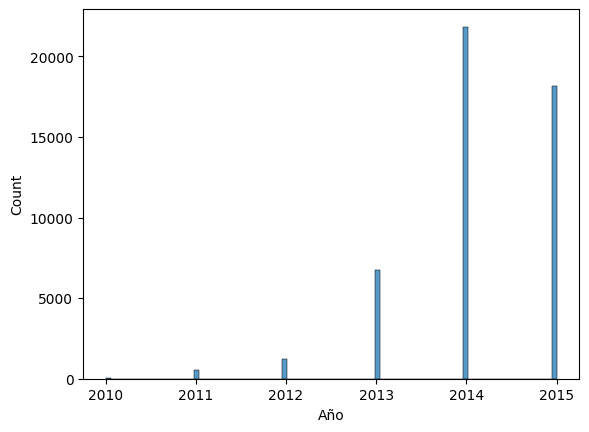

In [60]:
sns.histplot(df_users['Año'])

In [27]:
# vemos los nulos en porcentaje

df_users.isna().sum()*100 / len(df_users)

user_id       0.000000
review        0.065034
item_id       0.000000
recommend     0.000000
Año          16.999538
dtype: float64

In [28]:
# generamos un dataframe con la moda del año agrupada por item, para ver cada item en qué año tuvo más comentarios
df_año_item = df_users.groupby('item_id').agg({'Año': stats.mode}).reset_index()
df_año_item.rename(columns= {'Año': 'año_moda_por_item'}, inplace=True)
df_año_item['año_moda_por_item'] = df_año_item['año_moda_por_item'].apply(lambda x: x[0])
df_año_item.head()

,item_id,año_moda_por_item
0,10,2014.0
1,20,2015.0
2,30,2015.0
3,40,2014.0
4,50,2014.0


In [29]:
# unimos la columna generada (moda) al dataframe original
df_users = df_users.merge(df_año_item, how= 'left')
df_users.head()

,user_id,review,item_id,recommend,Año,año_moda_por_item
0,76561197970982479,Simple yet with great replayability. In my opi...,1250,1,2011.0,2014.0
1,76561197970982479,It's unique and worth a playthrough.,22200,1,2011.0,2011.0
2,76561197970982479,Great atmosphere. The gunplay can be a bit chu...,43110,1,2011.0,2014.0
3,js41637,I know what you think when you see this title ...,251610,1,2014.0,2014.0
4,js41637,For a simple (it's actually not all that simpl...,227300,1,2013.0,2014.0


In [30]:
# reemplazamos los valores nan de 'Año' por los valores de 'año_moda_por_item'
df_users['Año'] = df_users.apply(lambda row: row['año_moda_por_item'] if pd.isna(row['Año']) else row['Año'], axis=1)

In [31]:
# vemos que se redujo casi en un 12% la cantidad de nulos
df_users.isna().sum()*100 / len(df_users)

user_id              0.000000
review               0.065034
item_id              0.000000
recommend            0.000000
Año                  5.367014
año_moda_por_item    6.171382
dtype: float64

In [32]:
# reemplace los NaN con 0 (opcional)
df_users['Año'] = df_users['Año'].fillna(0)

# Converti la columna a tipo entero
df_users['Año'] = df_users['Año'].astype(int)

# Verifique el resultado
print(df_users['Año'].dtypes)  # Debería ser 'int'
print(df_users['Año'].unique())  


int32
[2011 2014 2013 2015 2012    0 2010]


In [33]:
df_users['Año'].value_counts()

Año
2014    25427
2015    21219
2013     6829
0        3136
2012     1210
2011      543
2010       67
Name: count, dtype: int64

In [34]:
# realizamos lo mismo pero con la moda calculada por usuario:
df_año_user = df_users.groupby('user_id').agg({'Año': stats.mode}).reset_index()
df_año_user.rename(columns= {'Año': 'año_moda_por_user'}, inplace=True)
df_año_user['año_moda_por_user'] = df_año_user['año_moda_por_user'].apply(lambda x: x[0])
df_año_user.head()

,user_id,año_moda_por_user
0,--000--,2014
1,--ace--,2014
2,--ionex--,2015
3,-2SV-vuLB-Kg,2014
4,-Azsael-,2015


In [35]:
df_users = df_users.merge(df_año_user, how= 'left')
df_users.head()

,user_id,review,item_id,recommend,Año,año_moda_por_item,año_moda_por_user
0,76561197970982479,Simple yet with great replayability. In my opi...,1250,1,2011,2014.0,2011
1,76561197970982479,It's unique and worth a playthrough.,22200,1,2011,2011.0,2011
2,76561197970982479,Great atmosphere. The gunplay can be a bit chu...,43110,1,2011,2014.0,2011
3,js41637,I know what you think when you see this title ...,251610,1,2014,2014.0,2013
4,js41637,For a simple (it's actually not all that simpl...,227300,1,2013,2014.0,2013


In [36]:
# reemplazamos los valores nan de 'Año' por los valores de 'año_moda_por_user'
df_users['Año'] = df_users.apply(lambda row: row['año_moda_por_user'] if pd.isna(row['Año']) else row['Año'], axis=1)

# eliminamos la columna 'año_moda_por_user'
df_users.drop(columns= 'año_moda_por_user', inplace=True)

df_users.isna().sum()           #vemos que quedan pocos nulos para imputar

user_id                 0
review                 38
item_id                 0
recommend               0
Año                     0
año_moda_por_item    3606
dtype: int64

In [37]:
# finalmente vamos a reemplazar los nulos que quedan por la moda de la columna año

df_users['Año'] = df_users['Año'].fillna(stats.mode(df_users['Año'])[0])

df_users.isna().sum()           # ya no quedan nulos en Año

user_id                 0
review                 38
item_id                 0
recommend               0
Año                     0
año_moda_por_item    3606
dtype: int64

<Axes: xlabel='Año', ylabel='Count'>

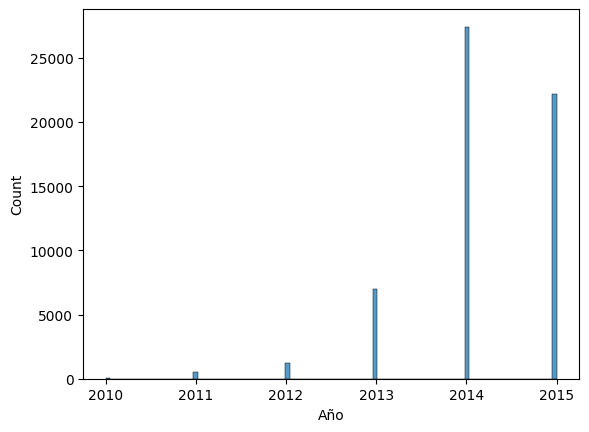

In [85]:
sns.histplot(df_users['Año'])               # podemos ver que la distribución de datos no se modificó por los reemplazos

In [38]:

df_users.to_parquet("c:\\Users\\Sofia\\Desktop\\Datasets\\reviews.parquet")